# Coherency and fooof

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from itertools import combinations

## Load Litvak Voxels

In [2]:
path = "../Litvak11/data/raw/subj1/"

data_on = sio.loadmat(path + "on/" + "R1.mat")
data_off = sio.loadmat(path + "off/" + "R1.mat")

### Get Labels

In [3]:
label_dic = {0: "SMA", 1: "leftM1", 2: "rightM1", 3: "STN_R01", 4: "STN_R12", 5: "STN_R23", 6: "STN_L01", 7: "STN_L12", 8: "STN_L23"}

## Obtain data fields of MATLAB structure (the ugly way..)

In [4]:
voxels_on = [data_on["data"][0][0][1][0][0][i] for i in range(len(label_dic))]
voxels_off = [data_off["data"][0][0][1][0][0][i] for i in range(len(label_dic))]
time = data_on["data"][0][0][2][0][0][0]

## Visualize Signal:


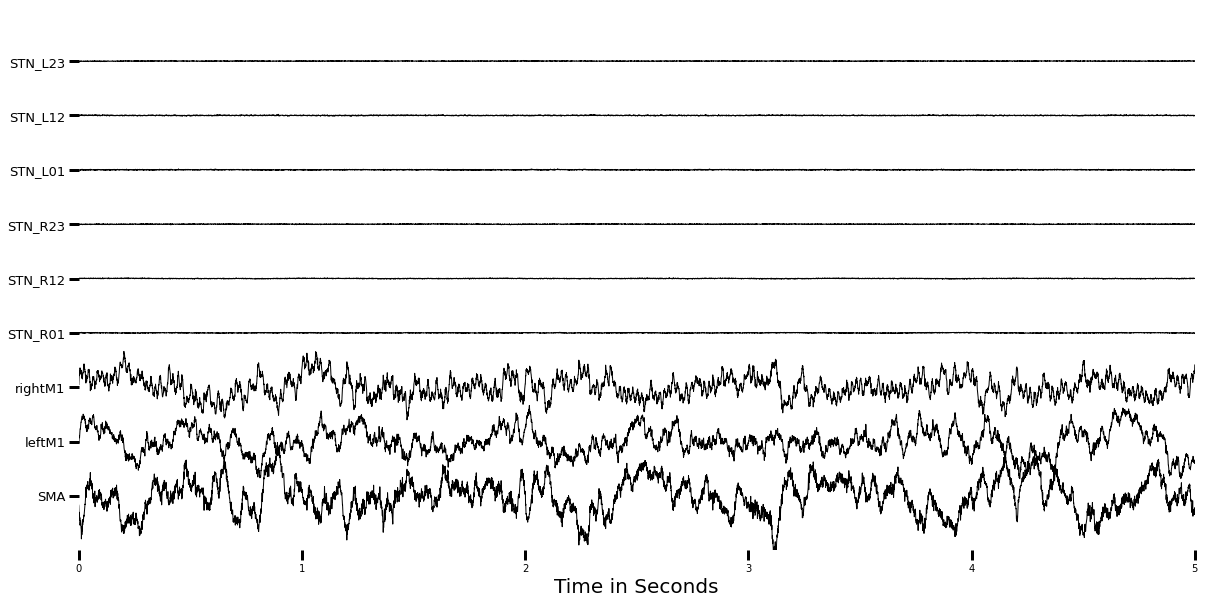

In [5]:
ydiff = 500
fontsize=20

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
for i, data in enumerate(voxels_on):
    ax.plot(time, data + i*ydiff,
           c="black", linewidth=1)

voxel_nms = [nme for nme in label_dic.values()]

ax.set_ylim([-1 * ydiff, len(voxel_nms) * ydiff])
ax.set_yticks(np.arange(0, len(voxel_nms)*ydiff, 1*ydiff))
ax.set_yticklabels(voxel_nms, fontsize=fontsize-7)
ax.set_xlabel("Time in Seconds", fontsize=20)
ax.tick_params(length=10, width=3, axis="both")
ax.set_xlim([0, 5]) # time to show in seconds

ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.show()

## Why are STN signals so weak?

In [6]:
for i in range(len(label_dic)):
    print(label_dic[i], f" Power: {np.mean(voxels_on[i]**2):.0f}")

SMA  Power: 26821
leftM1  Power: 21550
rightM1  Power: 11132
STN_R01  Power: 71
STN_R12  Power: 142
STN_R23  Power: 10
STN_L01  Power: 4
STN_L12  Power: 56
STN_L23  Power: 400


## -> STN Signals have only 0.5% of the power of Cortex Voxels

# Scale up STN Signal and plot 500ms only

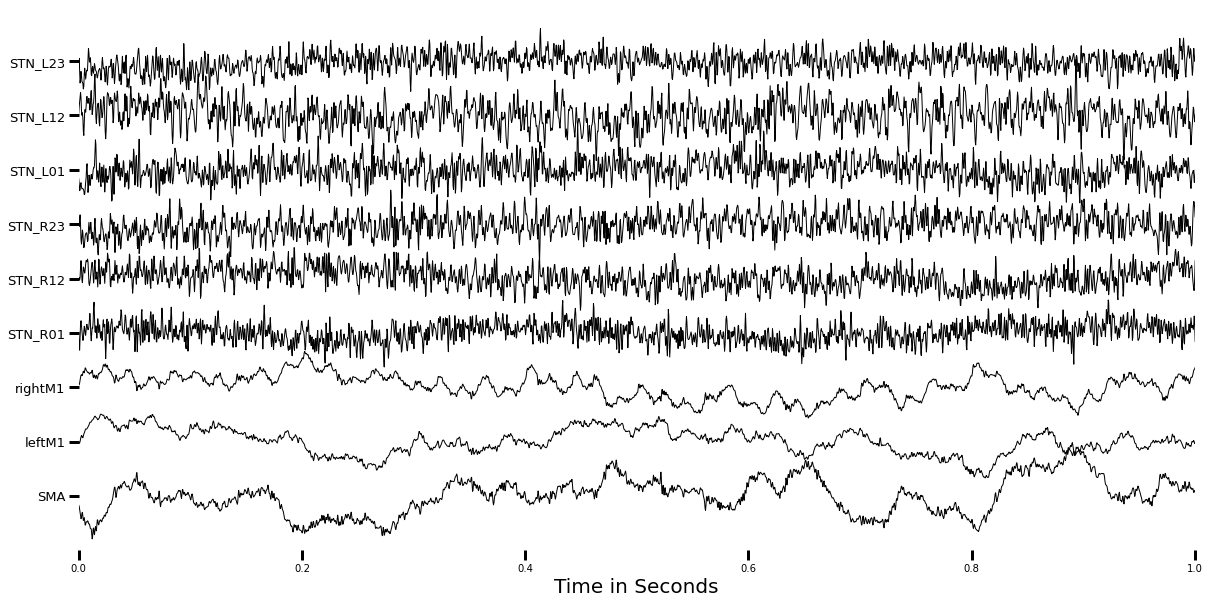

In [11]:
ydiff = 500
fontsize=20

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
for i, data in enumerate(voxels_on):
    if i > 2:
        STN_increase = 50
    else:
        STN_increase = 1
    ax.plot(time, data*STN_increase + i*ydiff,
           c="black", linewidth=1)

voxel_nms = [nme for nme in label_dic.values()]

ax.set_ylim([-1 * ydiff, len(voxel_nms) * ydiff])
ax.set_yticks(np.arange(0, len(voxel_nms)*ydiff, 1*ydiff))
ax.set_yticklabels(voxel_nms, fontsize=fontsize-7)
ax.set_xlabel("Time in Seconds", fontsize=20)
ax.tick_params(length=10, width=3, axis="both")
ax.set_xlim([0, 1]) # time to show in seconds

ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.show()

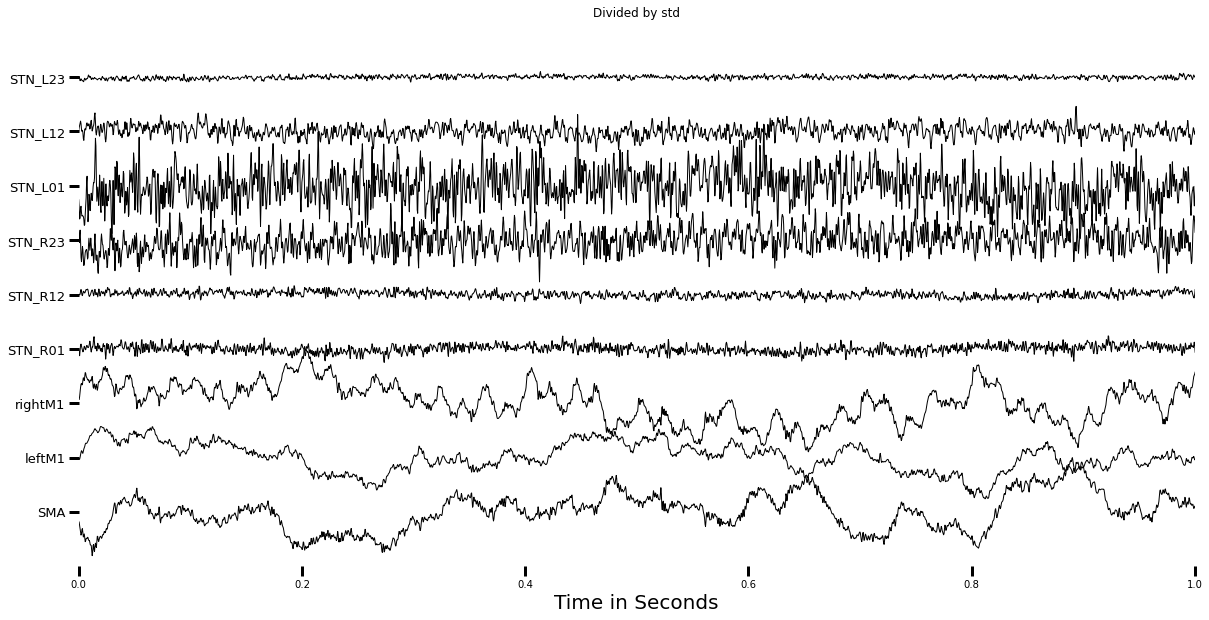

In [15]:
ydiff = 3
fontsize=20

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
for i, data in enumerate(voxels_on):
#    if i > 2:
#        STN_increase = 50
#    else:
#        STN_increase = 1
#    ax.plot(time, data*STN_increase + i*ydiff,
    ax.plot(time, data/np.std(data) + i*ydiff,
           c="black", linewidth=1)

voxel_nms = [nme for nme in label_dic.values()]

ax.set_ylim([-1 * ydiff, len(voxel_nms) * ydiff])
ax.set_yticks(np.arange(0, len(voxel_nms)*ydiff, 1*ydiff))
ax.set_yticklabels(voxel_nms, fontsize=fontsize-7)
ax.set_xlabel("Time in Seconds", fontsize=20)
ax.tick_params(length=10, width=3, axis="both")
ax.set_xlim([0, 1]) # time to show in seconds

ax.spines["bottom"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.title("Divided by std")
plt.show()

In [16]:
path = "../Litvak11/data/filtered/subj1/"

sample_r = 2400

freqs = sio.loadmat(path + "freqs.mat")
freqs_lin = sio.loadmat(path + "freqs_lin.mat")

phases_on = sio.loadmat(path + "on/" + "phase_on.mat")
phases_off = sio.loadmat(path + "off/" + "phase_off.mat")

amp_on = sio.loadmat(path + "on/" + "amp_on.mat")
amp_off = sio.loadmat(path + "off/" + "amp_off.mat")

spectrum_on = sio.loadmat(path + "on/" + "spectrum_on_lin.mat")
spectrum_off = sio.loadmat(path + "off/" + "spectrum_off_lin.mat")

freqs = freqs["freqs"][0]
freqs_lin = freqs_lin["freqs_lin"][0]
phases_on = phases_on["phase_on"]
phases_off = phases_off["phase_off"]
amp_on = amp_on["amp_on"]
amp_off = amp_off["amp_off"]
spectrum_on = spectrum_on["spectrum_on_lin"]
spectrum_off = spectrum_off["spectrum_off_lin"]

# Calculate fooof for all voxels

In [1]:
from fooof import FOOOF
fm = FOOOF(peak_width_limits=(1.0, 12.0))

In [142]:
freqs_lin[0]

1.0

# SMA On

SMA

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 256 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Parameters (

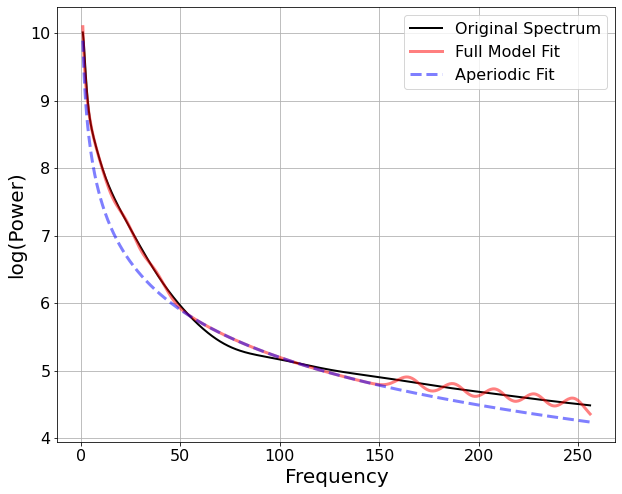

In [144]:
print(voxel_nms[0])
fm.report(freqs_lin, spectrum_on[0], [freqs_lin[0], freqs_lin[-1]])

# SMA Off

SMA

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 256 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Parameters (

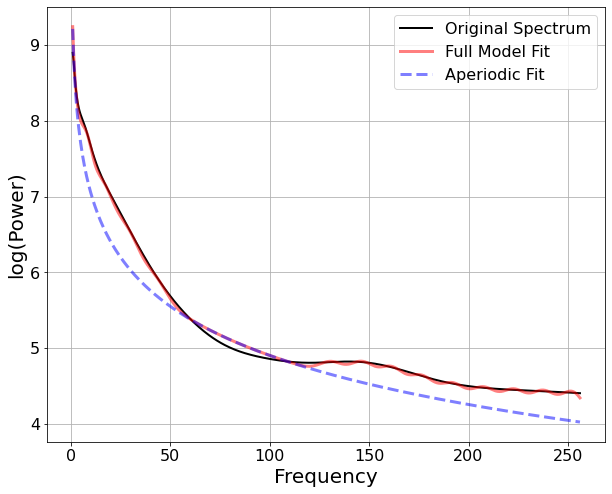

In [122]:
print(voxel_nms[0])
fm.report(freqs_lin, spectrum_off[0], [freqs_lin[0], freqs_lin[-1]])

# left M1 On

leftM1

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 256 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Parameter

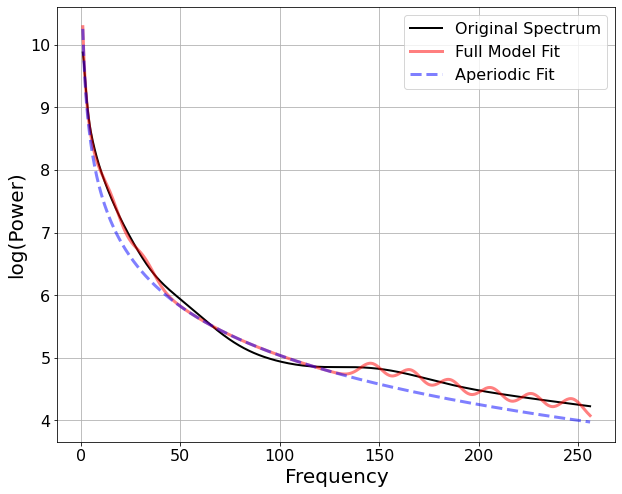

In [99]:
print(voxel_nms[1])
fm.report(freqs_lin, spectrum_on[1], [freqs_lin[0], freqs_lin[-1]])

# left M1 Off

leftM1

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 256 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Parameter

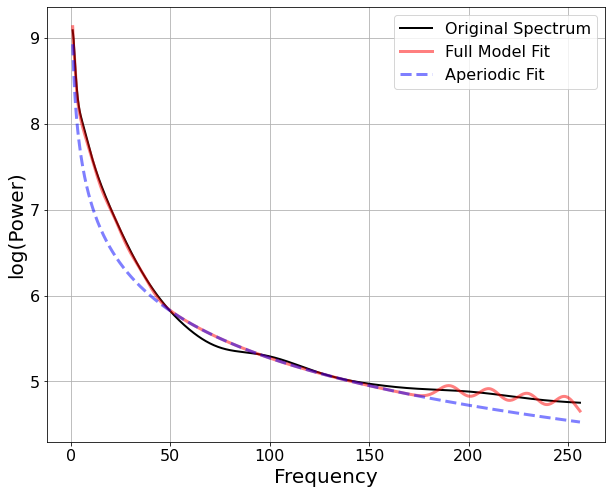

In [124]:
print(voxel_nms[1])
fm.report(freqs_lin, spectrum_off[1], [freqs_lin[0], freqs_lin[-1]])

# right M1 On

rightM1

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 256 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Paramete

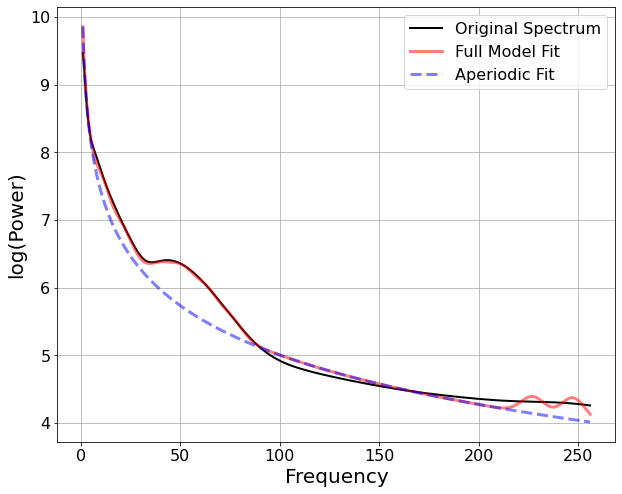

In [100]:
print(voxel_nms[2])
fm.report(freqs_lin, spectrum_on[2], [freqs_lin[0], freqs_lin[-1]])

# right M1 Off - 50 Hz Peak disappears

rightM1

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 256 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Paramete

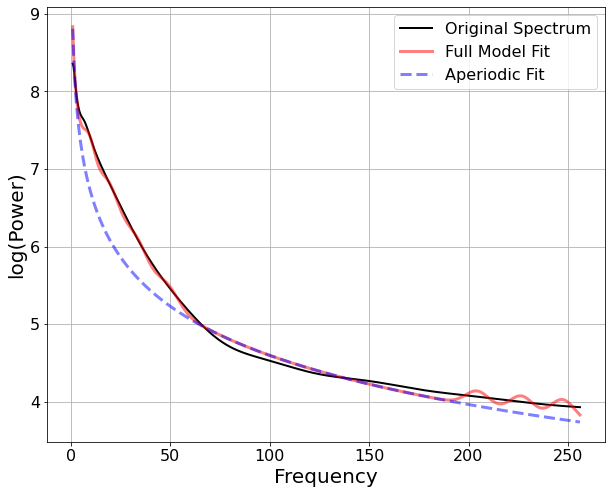

In [125]:
print(voxel_nms[2])
fm.report(freqs_lin, spectrum_off[2], [freqs_lin[0], freqs_lin[-1]])

# STN_R01 On

STN_R01

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 256 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Paramete

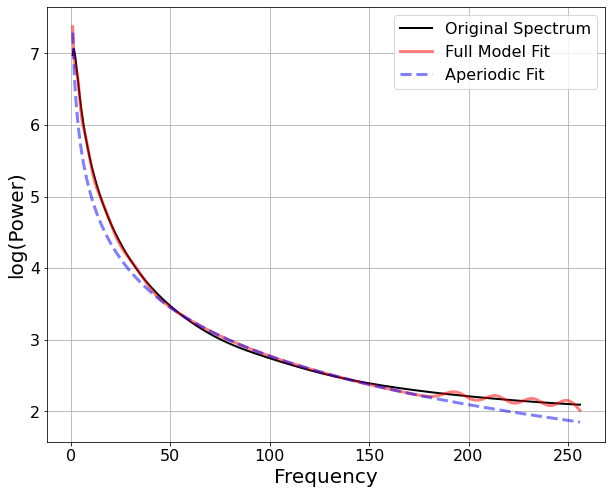

In [102]:
print(voxel_nms[3])
fm.report(freqs_lin, spectrum_on[3], [freqs_lin[0], freqs_lin[-1]])

# STN_R01 Off

STN_R01

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 256 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Paramete

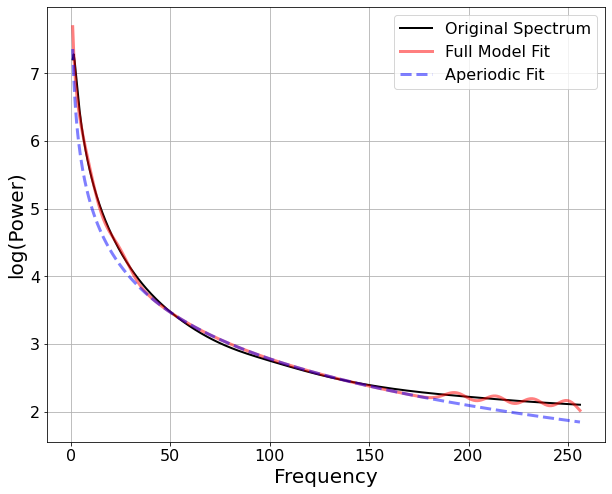

In [126]:
print(voxel_nms[3])
fm.report(freqs_lin, spectrum_off[3], [freqs_lin[0], freqs_lin[-1]])

# STN_R12 On

STN_R12

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 256 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Paramete

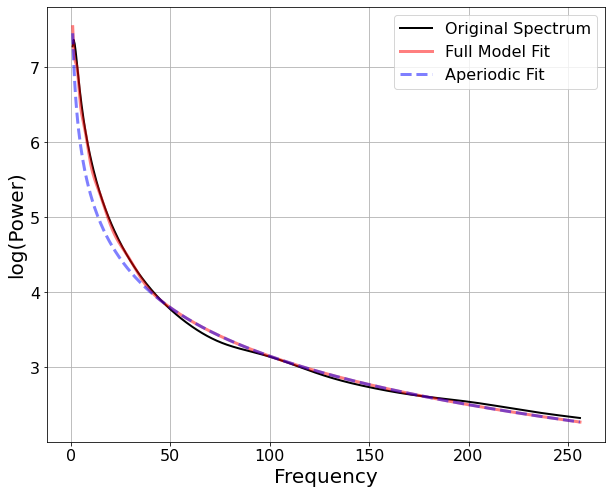

In [103]:
print(voxel_nms[4])
fm.report(freqs_lin, spectrum_on[4], [freqs_lin[0], freqs_lin[-1]])

# STN_R12 Off

STN_R12

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 256 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Paramete

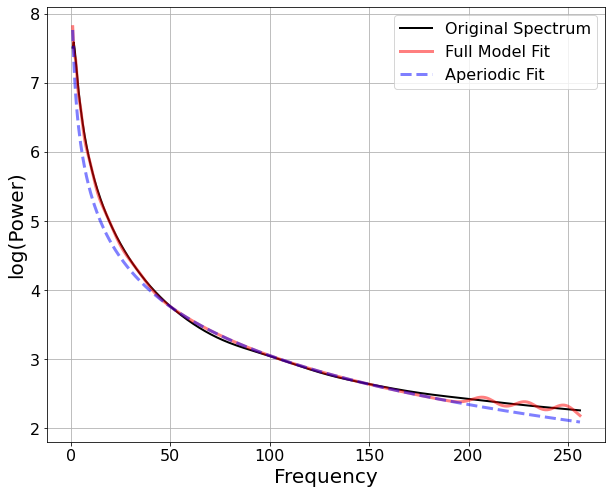

In [127]:
print(voxel_nms[4])
fm.report(freqs_lin, spectrum_off[4], [freqs_lin[0], freqs_lin[-1]])

# STN_R23 On

STN_R23

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 256 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Paramete

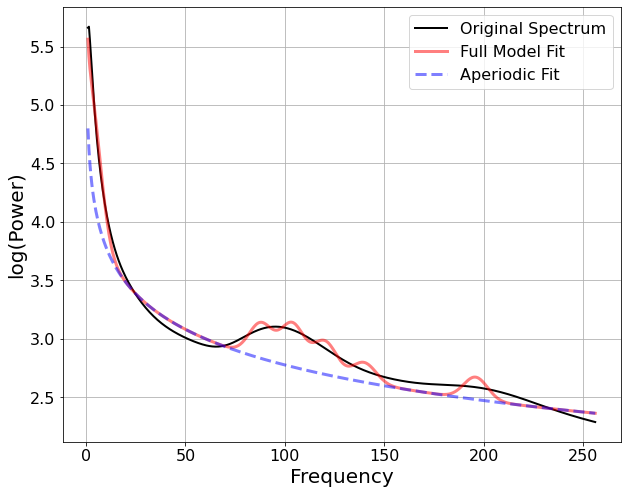

In [129]:
print(voxel_nms[5])
fm.report(freqs_lin, spectrum_on[5], [freqs_lin[0], freqs_lin[-1]])

# STN_R23 Off

STN_R23

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 256 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Paramete

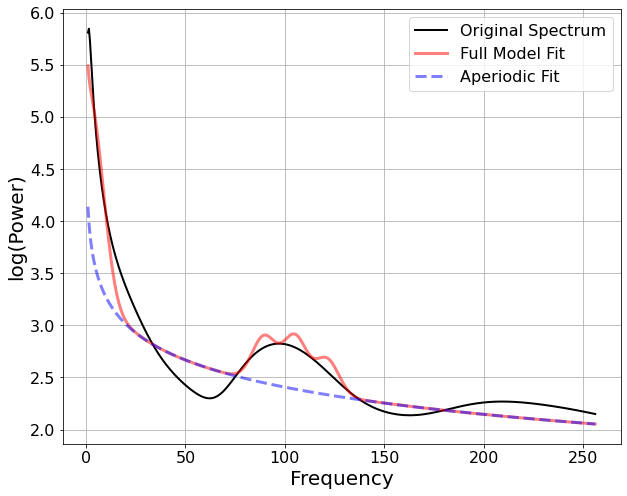

In [128]:
print(voxel_nms[5])
fm.report(freqs_lin, spectrum_off[5], [freqs_lin[0], freqs_lin[-1]])

# STN_L01 On

STN_L01

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 256 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Paramete

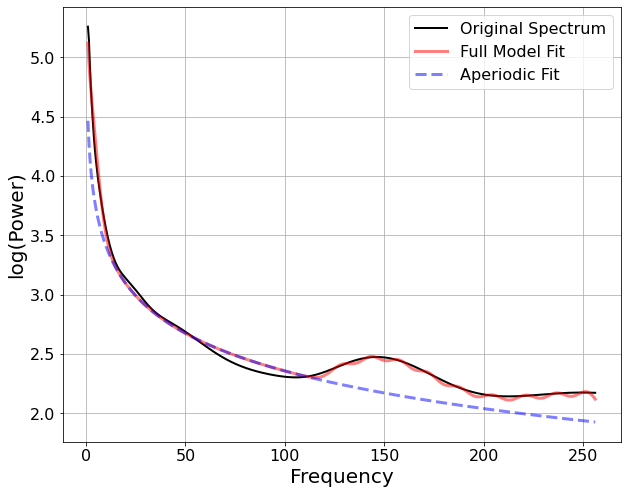

In [106]:
print(voxel_nms[6])
fm.report(freqs_lin, spectrum_on[6], [freqs_lin[0], freqs_lin[-1]])

# STN_L01 Off - 20 Hz Beta Peak appears

STN_L01

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 256 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Paramete

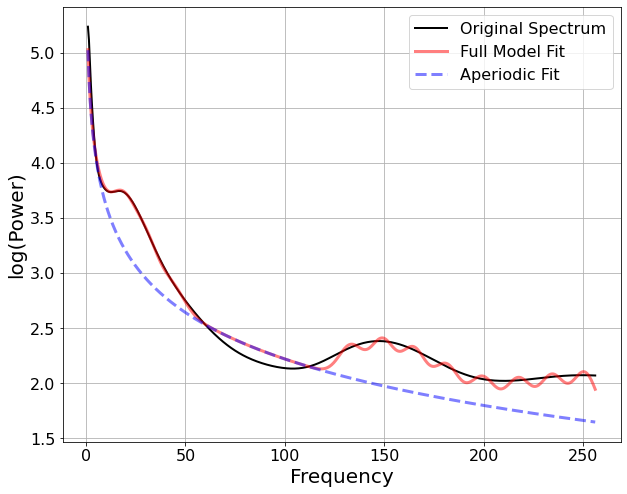

In [131]:
print(voxel_nms[6])
fm.report(freqs_lin, spectrum_off[6], [freqs_lin[0], freqs_lin[-1]])

# STN_L12 On

STN_L12

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 256 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Paramete

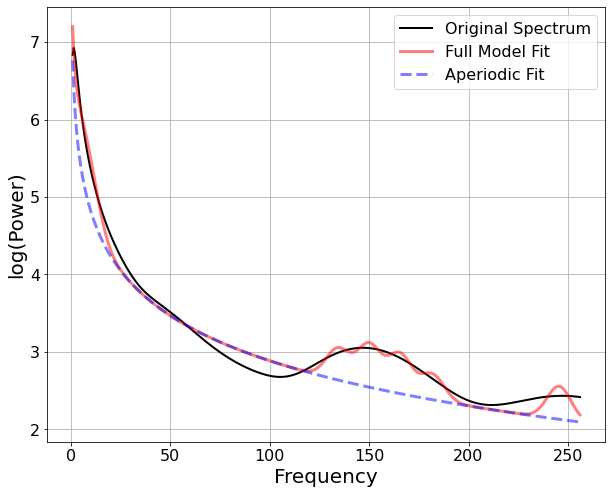

In [107]:
print(voxel_nms[7])
fm.report(freqs_lin, spectrum_on[7], [freqs_lin[0], freqs_lin[-1]])

# STN_L12 Off

STN_L12

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 256 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Paramete

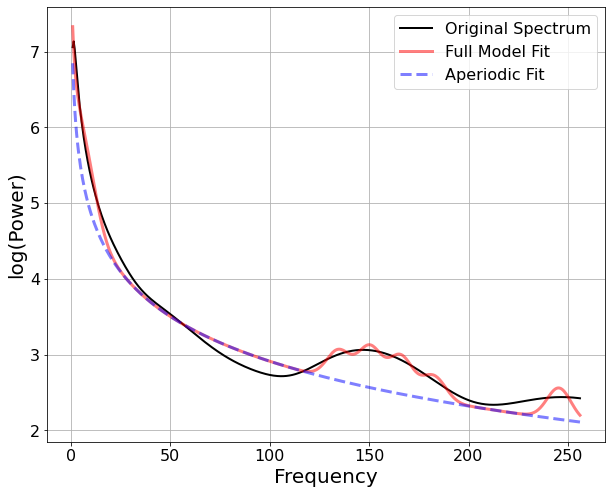

In [132]:
print(voxel_nms[7])
fm.report(freqs_lin, spectrum_off[7], [freqs_lin[0], freqs_lin[-1]])

# STN_L23 On

STN_L23

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 256 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Paramete

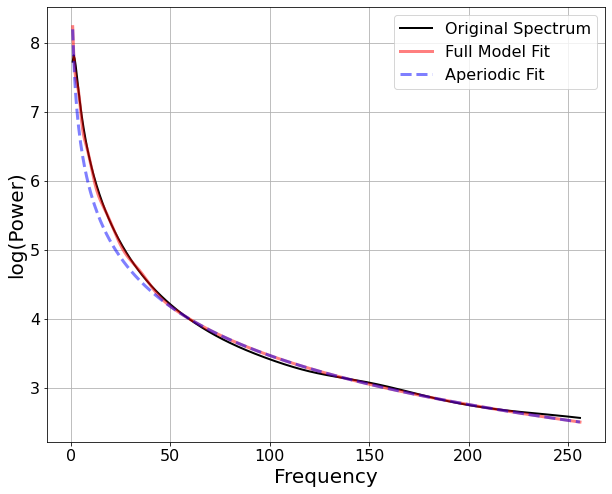

In [108]:
print(voxel_nms[8])
fm.report(freqs_lin, spectrum_on[8], [freqs_lin[0], freqs_lin[-1]])

# STN_L23 Off

STN_L23

FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 0.50 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                       The model was run on the frequency range 1 - 256 Hz                        
                                 Frequency Resolution is 0.50 Hz                                  
                                                                                                  
                            Aperiodic Paramete

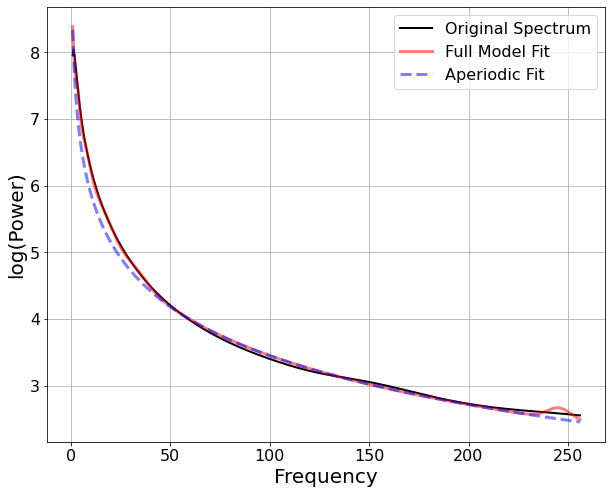

In [133]:
print(voxel_nms[8])
fm.report(freqs_lin, spectrum_off[8], [freqs_lin[0], freqs_lin[-1]])

# Summary fooof

- right M1, STN R23, STN L01, and STN L12 have clear oscillatory peaks
-  SMA, left M1, STN L23, STN R01, and STN R12 have no oscillatory peaks
- in the high frequency ranges the full model fit shows somw waves which seems to be an artifact

Visible on-off differences:
- 50 Hz peak disappears in off condition for right M1
- 20 Hz beta peak disappears in off condition for STN L01

Difference:

I don't understand:
- why are there no low frequency peaks?
- why are the high frequency peaks so broad?

# Revaluate Signal using Welch's method:

In [17]:
from scipy.signal import welch

In [18]:
print(voxel_nms[0])
sample_freq, powers = welch(voxels_on[0], fs=sample_r)
sample_freq_off, powers_off = welch(voxels_off[0], fs=sample_r, scaling="density")


SMA


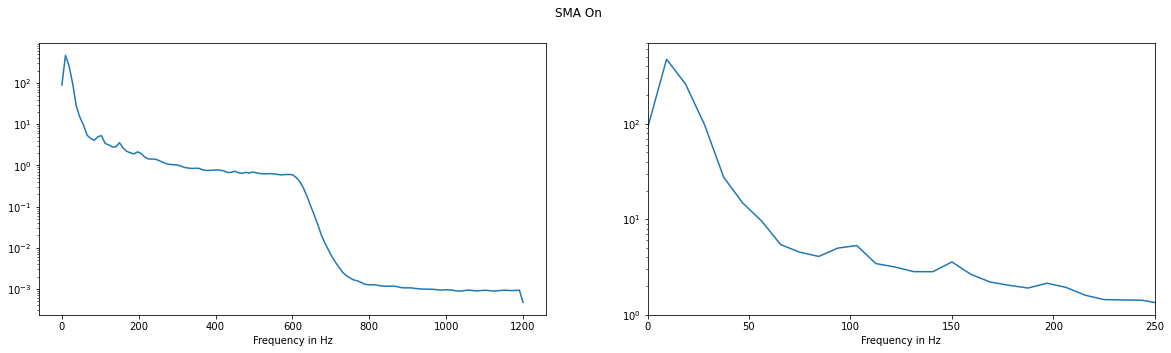

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].plot(sample_freq, powers)
ax[0].set_yscale("log")
ax[0].set_xlabel("Frequency in Hz")
ax[1].plot(sample_freq, powers)
ax[1].set_yscale("log")
ax[1].set_xlabel("Frequency in Hz")
ax[1].set_xlim([0, 250])
ax[1].set_ylim([1, 700])
plt.suptitle(voxel_nms[0] +" On")
plt.show()

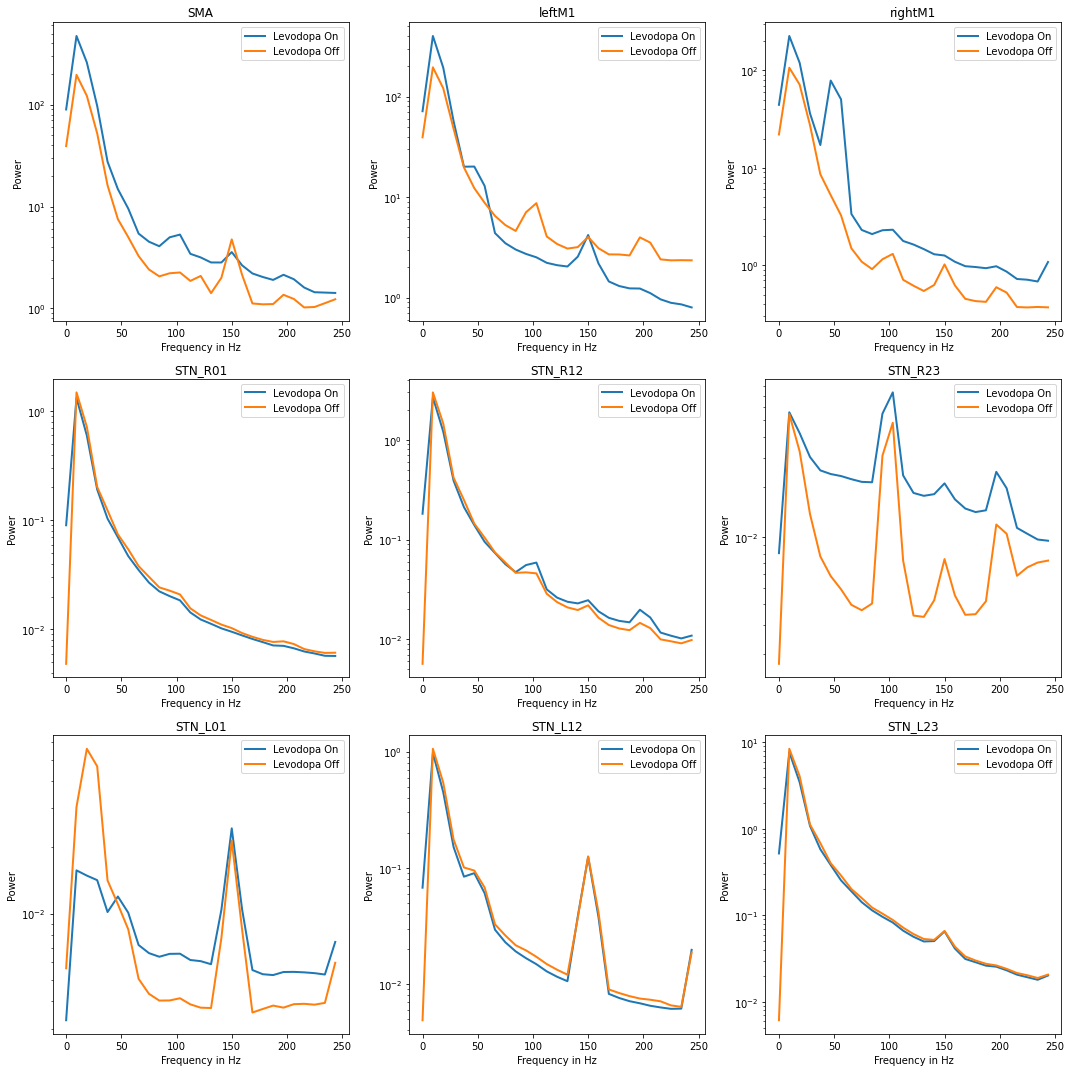

In [23]:
fig, ax = plt.subplots(3, 3, figsize=(15,15), sharey=False)

ax = ax.flatten()
#ymin = [1, 1, 1, ] 

for i, (voxel_on, voxel_off) in enumerate(zip(voxels_on, voxels_off)):
    
    sample_freq_on, powers_on = welch(voxel_on, fs=sample_r)
    sample_freq_off, powers_off = welch(voxel_off, fs=sample_r)
    
    ax[i].plot(sample_freq_on[0:27], powers_on[0:27], linewidth=2, label="Levodopa On")
    ax[i].plot(sample_freq_off[0:27], powers_off[0:27], linewidth=2, label="Levodopa Off")
    ax[i].set_yscale("log")
    ax[i].set_xlabel("Frequency in Hz", fontsize=10)
    ax[i].set_ylabel("Power", fontsize=10)
    ax[i].set_title(voxel_nms[i], fontsize=12)
 #   ax[i].set_xlim([0, 250])
    ax[i].legend()

plt.tight_layout()
#plt.savefig("/Users/moritzgerster/Documents/Code/Litvak11/plots/welch_spectrum.pdf")
plt.show()

In [22]:
sample_freq_on

array([   0.   ,    9.375,   18.75 ,   28.125,   37.5  ,   46.875,
         56.25 ,   65.625,   75.   ,   84.375,   93.75 ,  103.125,
        112.5  ,  121.875,  131.25 ,  140.625,  150.   ,  159.375,
        168.75 ,  178.125,  187.5  ,  196.875,  206.25 ,  215.625,
        225.   ,  234.375,  243.75 ,  253.125,  262.5  ,  271.875,
        281.25 ,  290.625,  300.   ,  309.375,  318.75 ,  328.125,
        337.5  ,  346.875,  356.25 ,  365.625,  375.   ,  384.375,
        393.75 ,  403.125,  412.5  ,  421.875,  431.25 ,  440.625,
        450.   ,  459.375,  468.75 ,  478.125,  487.5  ,  496.875,
        506.25 ,  515.625,  525.   ,  534.375,  543.75 ,  553.125,
        562.5  ,  571.875,  581.25 ,  590.625,  600.   ,  609.375,
        618.75 ,  628.125,  637.5  ,  646.875,  656.25 ,  665.625,
        675.   ,  684.375,  693.75 ,  703.125,  712.5  ,  721.875,
        731.25 ,  740.625,  750.   ,  759.375,  768.75 ,  778.125,
        787.5  ,  796.875,  806.25 ,  815.625,  825.   ,  834.

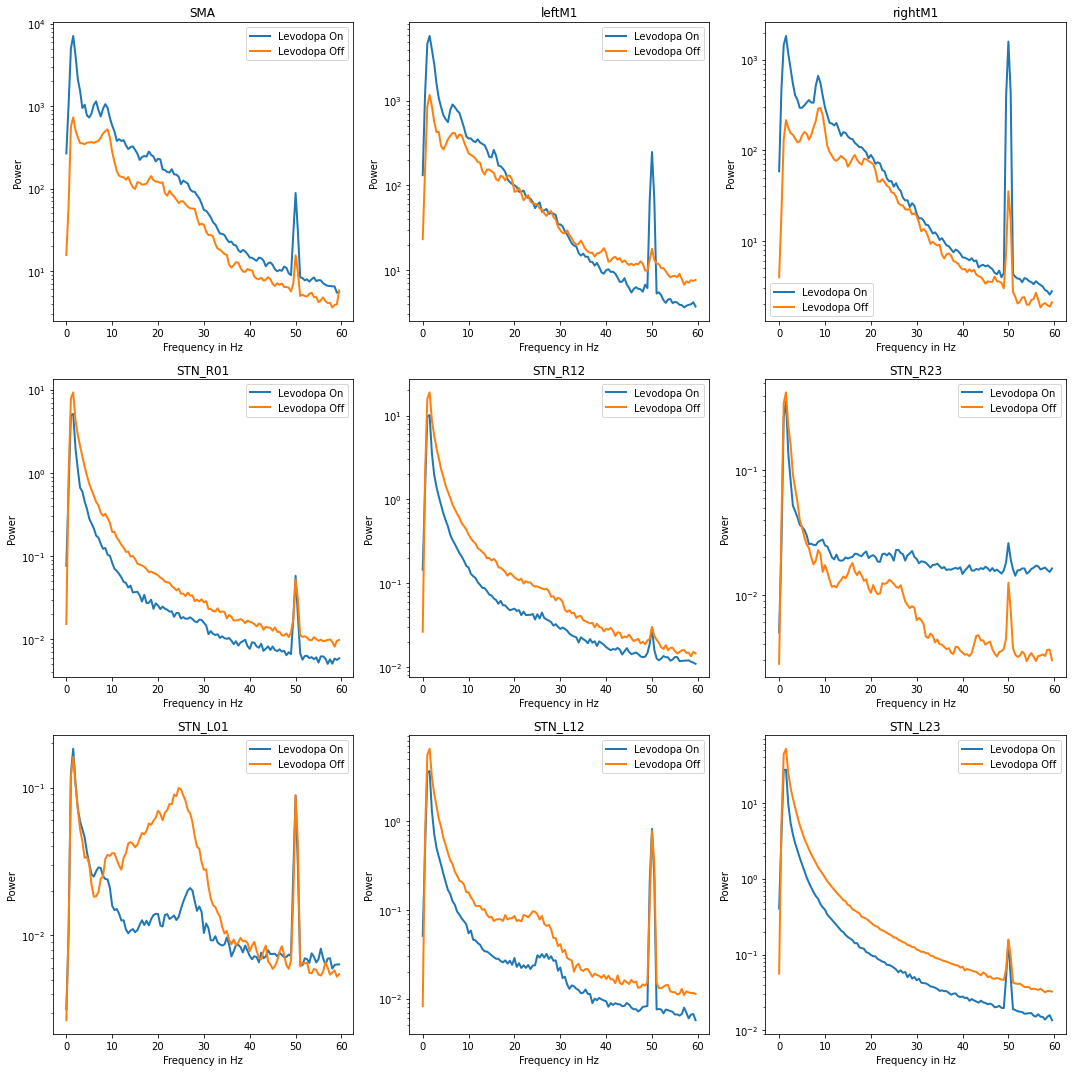

In [28]:
fig, ax = plt.subplots(3, 3, figsize=(15,15), sharey=False)

ax = ax.flatten()
#ymin = [1, 1, 1, ] 


for i, (voxel_on, voxel_off) in enumerate(zip(voxels_on, voxels_off)):
    
    sample_freq_on, powers_on = welch(voxel_on, fs=sample_r, nperseg=2*sample_r)
    sample_freq_off, powers_off = welch(voxel_off, fs=sample_r, nperseg=2*sample_r)
    
    fmax = np.argmin(abs(sample_freq_on-60))
    
    ax[i].plot(sample_freq_on[:fmax], powers_on[:fmax], linewidth=2, label="Levodopa On")
    ax[i].plot(sample_freq_off[:fmax], powers_off[:fmax], linewidth=2, label="Levodopa Off")
    ax[i].set_yscale("log")
    ax[i].set_xlabel("Frequency in Hz", fontsize=10)
    ax[i].set_ylabel("Power", fontsize=10)
    ax[i].set_title(voxel_nms[i], fontsize=12)
#    ax[i].set_xlim([0, 250])
    ax[i].legend()

plt.tight_layout()
plt.savefig("/Users/moritzgerster/Documents/Code/Litvak11/plots/welch_spectrum60.pdf")
plt.show()

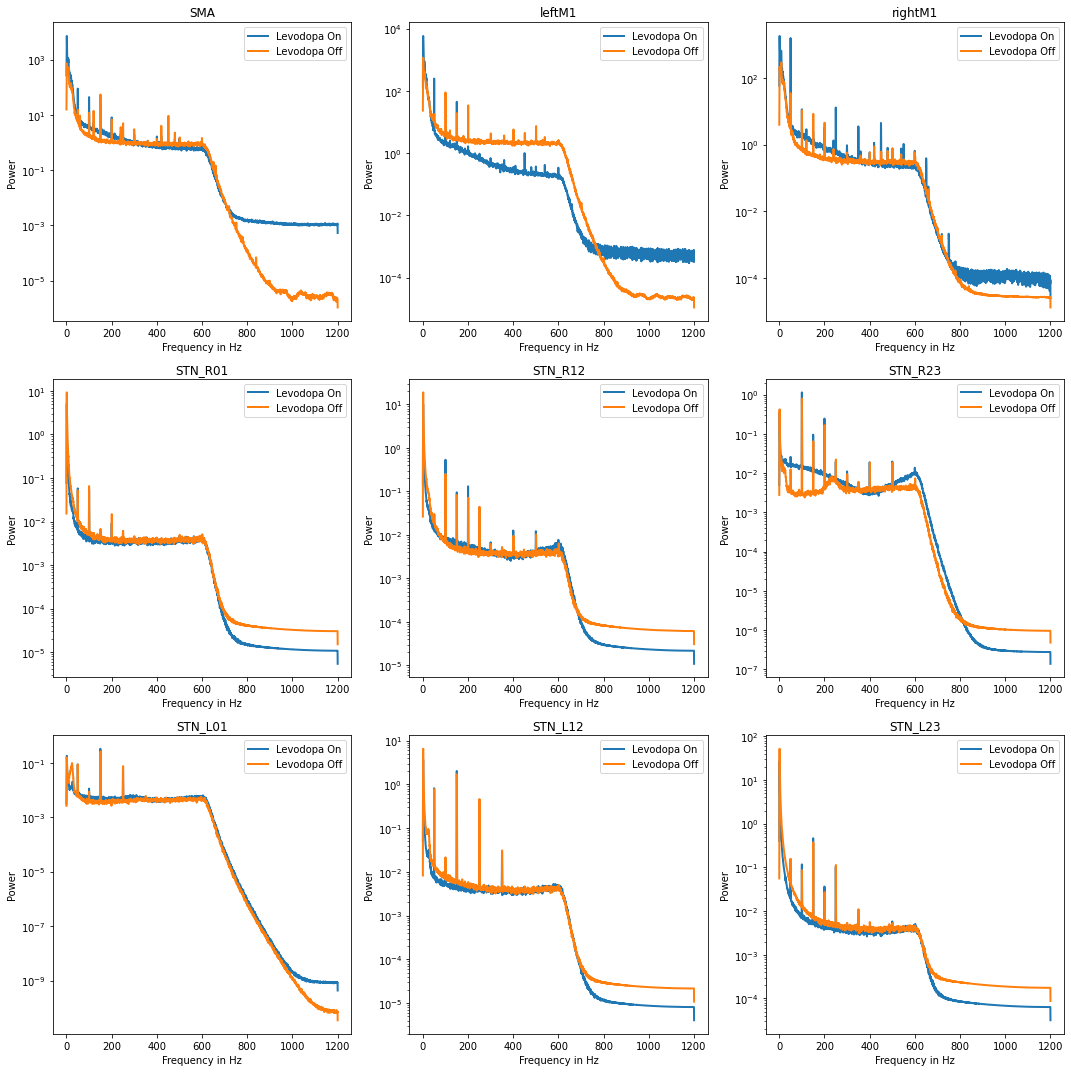

In [29]:
fig, ax = plt.subplots(3, 3, figsize=(15,15), sharey=False)

ax = ax.flatten()
#ymin = [1, 1, 1, ] 


for i, (voxel_on, voxel_off) in enumerate(zip(voxels_on, voxels_off)):
    
    sample_freq_on, powers_on = welch(voxel_on, fs=sample_r, nperseg=2*sample_r)
    sample_freq_off, powers_off = welch(voxel_off, fs=sample_r, nperseg=2*sample_r)
    
    ax[i].plot(sample_freq_on[:], powers_on[:], linewidth=2, label="Levodopa On")
    ax[i].plot(sample_freq_off[:], powers_off[:], linewidth=2, label="Levodopa Off")
    ax[i].set_yscale("log")
    ax[i].set_xlabel("Frequency in Hz", fontsize=10)
    ax[i].set_ylabel("Power", fontsize=10)
    ax[i].set_title(voxel_nms[i], fontsize=12)
#    ax[i].set_xlim([0, 250])
    ax[i].legend()

plt.tight_layout()
plt.savefig("/Users/moritzgerster/Documents/Code/Litvak11/plots/welch_spectrum_all.pdf")
plt.show()

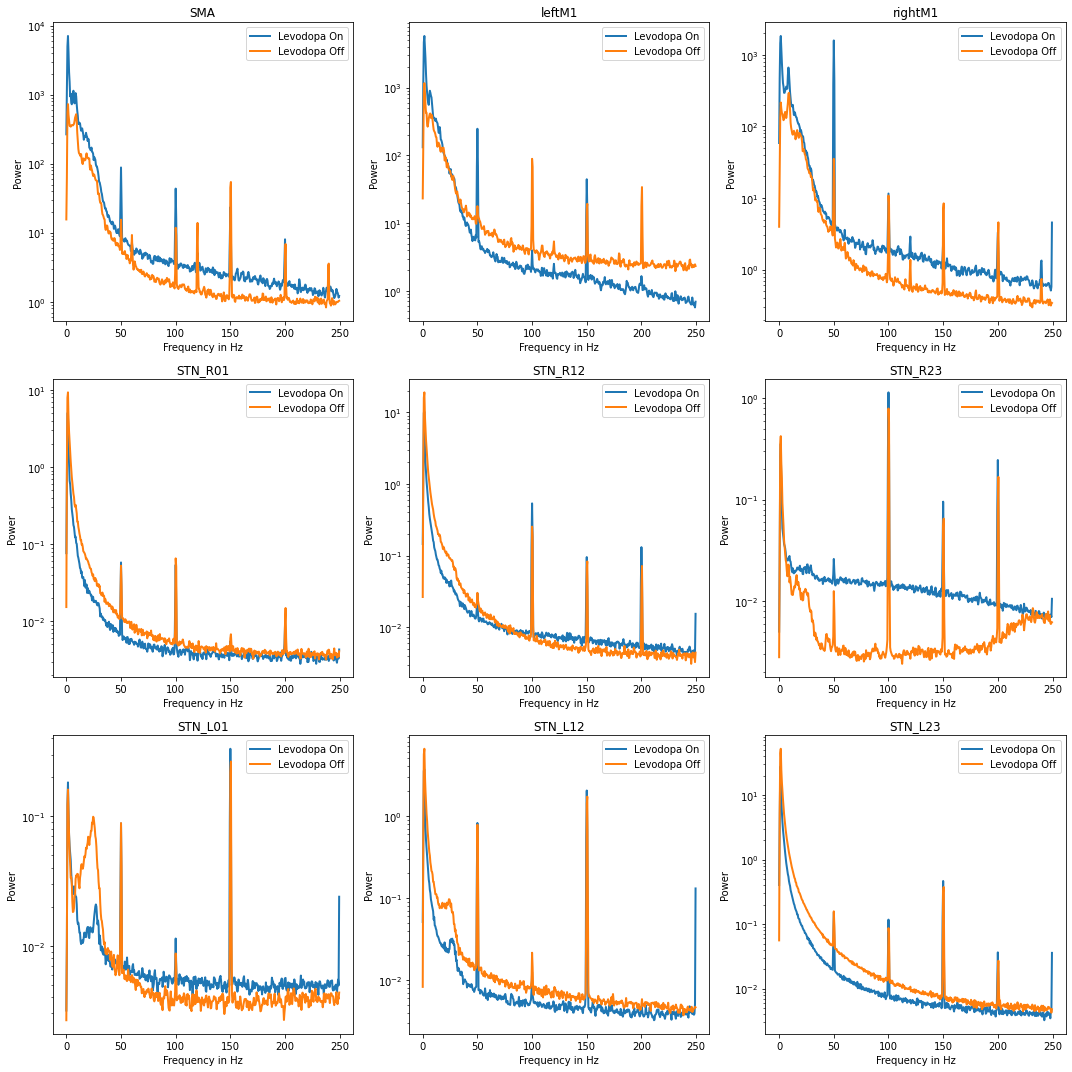

In [30]:
fig, ax = plt.subplots(3, 3, figsize=(15,15), sharey=False)

ax = ax.flatten()
#ymin = [1, 1, 1, ] 


for i, (voxel_on, voxel_off) in enumerate(zip(voxels_on, voxels_off)):
    
    sample_freq_on, powers_on = welch(voxel_on, fs=sample_r, nperseg=2*sample_r)
    sample_freq_off, powers_off = welch(voxel_off, fs=sample_r, nperseg=2*sample_r)
    
    fmax = np.argmin(abs(sample_freq_on-250))
    
    ax[i].plot(sample_freq_on[:fmax], powers_on[:fmax], linewidth=2, label="Levodopa On")
    ax[i].plot(sample_freq_off[:fmax], powers_off[:fmax], linewidth=2, label="Levodopa Off")
    ax[i].set_yscale("log")
    ax[i].set_xlabel("Frequency in Hz", fontsize=10)
    ax[i].set_ylabel("Power", fontsize=10)
    ax[i].set_title(voxel_nms[i], fontsize=12)
#    ax[i].set_xlim([0, 250])
    ax[i].legend()

plt.tight_layout()
plt.savefig("/Users/moritzgerster/Documents/Code/Litvak11/plots/welch_spectrum250.pdf")
plt.show()

# Gunnas Script

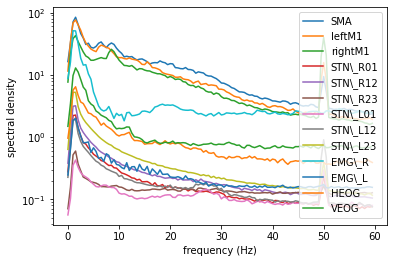

In [53]:
import numpy as np
import scipy
import scipy.io
import scipy.signal
import matplotlib.pyplot as plt

f_on_data = "../Litvak11/data/raw/subj1/on/R1.mat"
f_off_data = "../Litvak11/data/raw/subj1/off/R1.mat"

analyse = f_on_data

data = scipy.io.loadmat(analyse)['data'][0,0][1][0,0]
labels = [i[0][0] for i in scipy.io.loadmat(analyse)['data'][0,0][0]]
t = scipy.io.loadmat(analyse)['data'][0,0][2][0,0][0]

if np.allclose(np.diff(t), np.diff(t)[0]):
    d = np.diff(t)[0]
    s_rate = 1./d

    
f, psd =  scipy.signal.welch(data, fs=s_rate, nperseg=2*int(s_rate))

f_edge = 60

fig, ax2 = plt.subplots()
[ax2.semilogy(f[f<f_edge], sp[f<f_edge], label=la.replace('_', "\_"))
        for sp, la in zip(np.sqrt(psd)[:-1], labels[:-1])]
ax2.set_xlabel('frequency (Hz)')
ax2.set_ylabel('spectral density')
ax2.legend()